In [1]:
import os, re
from os.path import isdir, join, exists, abspath, isfile
import numpy as np
import matplotlib.pyplot as plt
from subprocess import call
from wordsegment import segment, clean
from nltk.stem.snowball import SnowballStemmer
%matplotlib notebook

# Load documents and scrutinize unwanted punctuations
**Load document labels**

In [4]:
raw_path = u'./corpus/journal/' # it will listdir into unicode

**Open documents from each folder**

In [14]:
%%time
label_freqs = []
dataset_contents, dataset_labels, dataset_filenames, content_lengths = [], [], [], [] # will be used later
for i, label in enumerate(doc_labels):
    curr_dir = join(raw_path, label)
    fns = os.listdir(curr_dir)
#     print len(fns), label
    label_freqs.append(len(fns))
    for fn in fns:
        file_path = join(curr_dir, fn)
        with open(file_path, 'r') as f:
            content = unicode(f.read(), 'utf8')
            content_lengths.append(len(content))
            dataset_contents.append(content)
            dataset_labels.append(i)
            dataset_filenames.append(fn)

Wall time: 50.6 s



Read files and retain only files larger than 100 bytes

In [18]:
total_files = 0
junk_files = 0
file_sizes = 0
dataset_contents, dataset_filenames = [], []
for root, folders, files in os.walk(raw_path):
    total_files += len(files)
    for fn in files:
        path = os.path.join(root, fn)
        size = os.path.getsize(path)
        if size <= 100:
            junk_files += 1
            continue
        file_sizes += size
        with open(path) as f:
            content = f.read().decode('utf8')
            dataset_contents.append(content)
            dataset_filenames.append(fn)
print 'total_files:', total_files
print 'junk_files:', junk_files
print 'usable files:', len(dataset_contents)
print 'usable files average size (bytes):', file_sizes / len(dataset_filenames)

total_files: 3407
junk_files: 1242
usable files: 2165
usable files average size (bytes): 31262


**Show histogram of all contents' length**

<IPython.core.display.Javascript object>


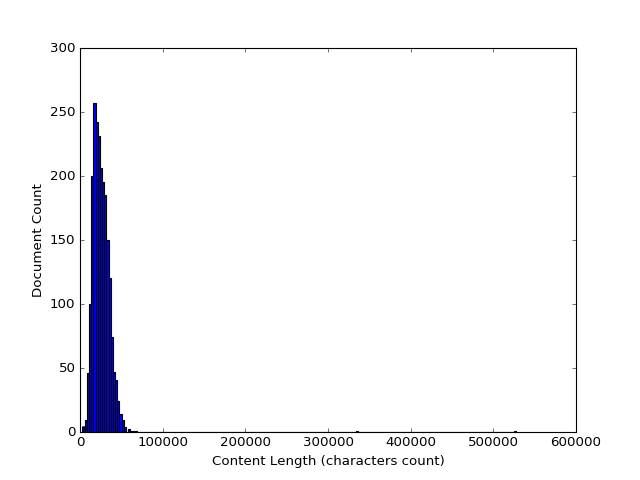

In [21]:
plt.figure()
plt.hist([len(content) for content in dataset_contents], bins=200)
plt.xlabel('Content Length (characters count)')
plt.ylabel('Document Count')
plt.show()

In [22]:
def has_thai_char(s):
    return any(u'\u0e00' < c < u'\u0f00' for c in s)
print has_thai_char(u'สวัสดีจ้ะ english')
print has_thai_char(u'Ianalysis')

True
False


## Scrutinize unwanted punctuations
**Define scrutinize() function**

In [23]:
punctuations = set(u'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~')
stemmer = SnowballStemmer('english')
limit = 70
def scrutinize(s):
    scrutinized = u''.join(u' ' if c in punctuations else c for c in s) # remove all punctuations inside s
    segmented = []
    for sentence in scrutinized.split(): # split contiguous english words if possible
        if not has_thai_char(sentence):
            sentence = clean(sentence)
            try:
                if len(sentence) > limit:
                    raise ValueError('too long to segment len > %d' % limit)
                sentence = u' '.join(stemmer.stem(word) for word in segment(sentence))
            except Exception, e:
                print 'skip (len=%d, word=%s..., exception=%s)' % (len(sentence), sentence[:50], str(e))
                sentence = None
        if sentence:
            segmented.append(sentence)
    return u' '.join(segmented)

**Sample Original Content**

In [24]:
sample = dataset_contents[3][:2**9]
print sample
# sample

A0804280939004967.txt

Kasetsart J. (Nat. Sci) 32 : 150 - 157 (1998) «. ‡°…µ√»“ µ√å («‘∑¬.) ªï∑’Ë 32 : 150 - 157 (2541)°“√æ—≤π“‰ª‡ªìπµâπÕàÕπ®“°‚ª√‚µæ≈“ ¢Õßæ◊™µ√–°Ÿ≈°–À≈Ë”„π ¿“æ in-vitro

In-vitro Plant Regeneration from Protoplastin Brassica Family

Õ√‘¬“¿√≥å  æß…å√—µπåAriyaporn PongratABSTRACT

Nine  species of Brassica family were studied for the genetic control of in vitro regenerability fromprotoplast. In Brassica family, the protoplast culture should be kept in the dark after the protoplast isolationfo


**Sample Content Scrutinized**

In [25]:
scrutinized = scrutinize(sample)
print scrutinized
# scrutinized

a0804280939004967 txt kasetsart j nat sci 32 150 157 1998 32 150 157 2541 in vitro in vitro plant regener from protoplast in brassica famili ariya porn pong rat abstract nine speci of brassica famili were studi for the genet control of in vitro re gener abil from protoplast in brassica famili the protoplast cultur should be kept in the dark after the protoplast isol fo


**Scrutinize all contents**

In [26]:
%%time
for i in xrange(len(dataset_contents)):
    print i,
    dataset_contents[i] = scrutinize(dataset_contents[i])

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 skip (len=91, word=02040608010012019611963196519671969197119731975197..., exception=too long to segment len > 70)
38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 skip (len=79, word=lflavourtasteappearancetextureacceptanceflavourtas..., exception=too long to segment len > 70)
112 113 114 115 skip (len=71, word=p2t2p4t4p7t7expansionvalvemoistureindicatorsightgl..., exception=too long to segment len > 70)
116 117 118 119 120 121 122 123 124 125 skip (len=94, word=36vqq36vqq0luuruvvqq6fdohg66qq0luuruvvqq6fdohg6vqq..., exception=too long to segment len > 70)
126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 skip (len=81, word=prlvwxuhfrqghqvdwlrqdqguhfdofxo

**Save scrutinized contents**

In [27]:
%%time
scrutinized_path = './corpus/scrutinized-journal'
if not exists(scrutinized_path):
    os.makedirs(scrutinized_path)
for content, fn in zip(dataset_contents, dataset_filenames):
    file_path = join(scrutinized_path, fn)
    with open(file_path, 'w') as f:
        f.write(content.encode('utf8'))
del dataset_contents

Wall time: 31.1 s


# Segment each document and save them
**Create new folders if necessary**

In [28]:
segmented_path = u'./corpus/segmented-journal'
folder_path = segmented_path
if not exists(folder_path):
    os.makedirs(folder_path)
    print 'New folder', folder_path

New folder ./corpus/segmented-journal


** Create temporary paths file then call Java LongLexTo on that file to segment all documents**

In [29]:
%%time
try:
    os.chdir('LongLexTo')
except:
    pass
print os.getcwdu()
tmp_paths = u'tmp_paths.txt'
tmp_output = u'tmp_output.txt'
with open(tmp_paths, 'w') as f:
    contents = []
    for fn in dataset_filenames:
        ifp = join('..', scrutinized_path, fn) # input file path
        ofp = join('..', segmented_path, fn) # output file path
        if not isfile(ifp):
            print 'Error:', ifp, ofp
            raise AssertionError('input file path is invalid')
        content = ifp + u'\n' + ofp + u'\n'
        contents.append(content)
    content = u'q\n'
    contents.append(content)
    f.write(''.join(contents).encode('utf8'))
print 'Running...'
return_code = call(u'java LongLexTo -Dfile.encoding=UTF-8 < %s > %s' % (tmp_paths, tmp_output), shell=True)
print 'return code:', return_code
print 'Please see %s and %s for more info' % (tmp_paths, tmp_output)
if return_code:
    print 'You may need to call the Java commmand yourself because I failed'
    print 'The paths creation process was successful but the segmentation went wrong'
    print 'Go into the folder LongLexTo, open a shell then type the following command'
    print 'java -Dfile.encoding=UTF-8 LongLexTo < tmp_paths.txt'
    print 'Wait a minute and go check at the segmented-journal folder to see if the segmentation went right.'
    print 'The file will be encoded in UTF-8 and there will be no punctuations in each file.'
os.chdir('..')

D:\off99555\Documents\GitHub\Thai-thesis-classification\LongLexTo
Running...
return code: 1
Please see tmp_paths.txt and tmp_output.txt for more info
You may need to call the Java commmand yourself because I failed
The paths creation process was successful but the segmentation went wrong
Go into the folder LongLexTo, open a shell then type the following command
java -Dfile.encoding=UTF-8 LongLexTo < tmp_paths.txt
Wait a minute and go check at the segmented-journal folder to see if the segmentation went right.
The file will be encoded in UTF-8 and there will be no punctuations in each file.
Wall time: 43.3 s
